In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, QuantileTransformer, Normalizer, RobustScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error as mse

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

ModuleNotFoundError: ignored

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Car Price Prediction/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Car Price Prediction/Test.csv')
sub = pd.read_csv('/content/drive/MyDrive/Car Price Prediction/SampleSubmission.csv')

In [ ]:
display(train.head())
display(test.head())
display(sub.head())

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL18518,Abuja,BMW,323i,"2,008",White,Foreign Used,30524.0
1,VHL17149,Lagos,Toyota,Camry,"2,013",White,Foreign Used,NaN
2,VHL10927,Lagos,Toyota,Highlander Limited V6,"2,005",Gold,Foreign Used,NaN
3,VHL12909,Lagos,Toyota,Camry,"2,011",Gray,Foreign Used,166839.0
4,VHL12348,Lagos,Lexus,ES 350 FWD,"2,013",Red,Foreign Used,88862.0


,VehicleID,Amount (Million Naira)
0,VHL18518,1.0
1,VHL17149,1.0
2,VHL10927,1.0
3,VHL12909,1.0
4,VHL12348,1.0


In [ ]:
train["Model"].value_counts().nlargest(9)

Camry                    651
ES 350                   300
Corolla                  282
C300                     199
RX                       158
RX 350                   145
Accord                   132
M Class ML 350 4Matic    114
RX 350 AWD               112
Name: Model, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


## combining of train and test datasets

In [ ]:
test_copy = test.copy()
test_copy['Amount (Million Naira)'] = 'test'
data = pd.concat([train, test_copy])
data[:-1]

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"
...,...,...,...,...,...,...,...,...,...
2055,VHL16136,Abuja,Dodge,Charger,"2,008",Black,test,Foreign Used,NaN
2056,VHL17903,Abuja,Toyota,Avalon,"2,020",Red,test,Foreign Used,2650.0
2057,VHL14018,Ibadan,Audi,Q5,"2,011",Blue,test,Foreign Used,99000.0
2058,VHL17473,Ibadan,Toyota,Camry,"2,015",Black,test,Foreign Used,108000.0


## Cleaning the datasets

In [ ]:
data.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [ ]:
data.info

<bound method DataFrame.info of      VehicleID Location          Maker                Model   Year  Colour  \
0     VHL12546    Abuja          Honda  Accord Coupe EX V-6  2,011  Silver   
1     VHL18827   Ibadan        Hyundai               Sonata  2,012  Silver   
2     VHL19499    Lagos          Lexus               RX 350  2,010     Red   
3     VHL17991    Abuja  Mercedes-Benz            GLE-Class  2,017    Blue   
4     VHL12170   Ibadan         Toyota           Highlander  2,002     Red   
...        ...      ...            ...                  ...    ...     ...   
2056  VHL17903    Abuja         Toyota               Avalon  2,020     Red   
2057  VHL14018   Ibadan           Audi                   Q5  2,011    Blue   
2058  VHL17473   Ibadan         Toyota                Camry  2,015   Black   
2059  VHL11480    Abuja          Lexus           IS 350 AWD  2,013   White   
2060  VHL13881    Abuja        Pontiac              Torrent  2,009  Silver   

     Amount (Million Naira)    

In [ ]:
data.describe()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
count,9266,9266,9266,9266,9243,9266,9249,9015,6230
unique,6065,3,56,1412,35,24,743,3,4164
top,VHL10753,Lagos,Toyota,Camry,"2,008",Black,test,Foreign Used,"75,000"
freq,6,4240,3558,834,949,2738,2061,6286,70


In [ ]:
data.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        23
Colour                       0
Amount (Million Naira)      17
Type                       251
Distance                  3036
dtype: int64

In [ ]:

data["Year"].unique()

array(['2,011', '2,012', '2,010', '2,017', '2,002', '2,019', '2,015',
       '2,004', '2,003', '2,008', '2,018', '2,020', '2,006', '2,016',
       '2,014', '2,007', '2,009', '2,005', '2,021', '2,013', '2,000', nan,
       '1,992', '2,001', '1,997', '1,999', '1,993', '1,998', '1,986',
       '1,996', '2,022', '1,995', '1,979', '1,989', '1,991', '1,982'],
      dtype=object)

In [ ]:
data["Amount (Million Naira)"].unique()

array([2.2, 3.5, 9.2, 22.8, 2.6, 7.5, 79.0, 9.0, 7.76, 2.5, 7.2, 3.26,
       1.91, 6.95, 17.0, 3.55, 22.0, 23.0, 14.0, 4.9, 2.48, 16.0, 4.6,
       15.0, 11.85, 4.1, 4.5, 4.2, 7.8, 5.9, 4.0, 2.4, 3.0, 3.2, 2.66,
       115.0, 3.3, 5.5, 3.85, 2.3, 58.9, 2.8, 6.5, 8.25, 6.8, 2.08, 1.46,
       3.6, 6.85, 3.75, 10.0, 2.81, 1.8, 67.5, 1.5, 1.69, 6.73, 9.5, 5.78,
       9.7, 3.8, 8.44, 4.45, 29.0, 11.25, 2.05, 21.5, 3.59, 5.4, 10.69,
       11.9, 7.4, 8.68, 8.5, 1.2, 7.31, 3.95, 6.0, 10.8, 52.0, 16.55,
       45.0, 3.9, 195.0, 27.0, 4.35, 5.6, 9.9, 3.15, 8.7, 3.4, 7.9, 8.0,
       10.2, 10.5, 4.39, 1.9, 1.4, 12.0, 13.9, 4.7, 9.1, 7.65, 2.25, 6.2,
       40.0, 1.63, 12.5, 2.0, 6.7, 3.38, 9.56, 87.5, 9.8, 4.25, 5.3, 5.25,
       2.7, 35.5, 58.0, 66.5, 5.16, 3.58, 2.59, 14.5, 16.31, 32.0, 1.15,
       5.1, 3.25, 13.2, 11.8, 6.25, 5.8, 4.3, 2.85, 3.94, 25.0, 28.0,
       25.5, 13.5, 43.0, 2.75, 6.45, 1.01, 19.8, 2.03, 7.0, 15.5, 5.65,
       6.3, 3.82, 44.0, 4.65, 2.9, 3.35, 24.0, 6.6, 2.1, 4.

In [ ]:
data["Type"].unique()

array(['Nigerian Used', 'Foreign Used', 'Brand New', nan], dtype=object)

In [ ]:
data["Distance"].unique()

array([nan, '125,000', '110,852', ..., 2650.0, 52485.0, 124088.0],
      dtype=object)

In [ ]:
data['Year'] = data['Year'].str.replace(',','')

In [ ]:
data["Year"].unique()

array(['2011', '2012', '2010', '2017', '2002', '2019', '2015', '2004',
       '2003', '2008', '2018', '2020', '2006', '2016', '2014', '2007',
       '2009', '2005', '2021', '2013', '2000', nan, '1992', '2001',
       '1997', '1999', '1993', '1998', '1986', '1996', '2022', '1995',
       '1979', '1989', '1991', '1982'], dtype=object)

In [ ]:
data["Amount (Million Naira)"] = data["Amount (Million Naira)"].apply(pd.to_numeric,errors='coerce')

In [ ]:
data["Amount (Million Naira)"].unique()

array([2.200e+00, 3.500e+00, 9.200e+00, 2.280e+01, 2.600e+00, 7.500e+00,
       7.900e+01, 9.000e+00, 7.760e+00, 2.500e+00, 7.200e+00, 3.260e+00,
       1.910e+00, 6.950e+00, 1.700e+01, 3.550e+00, 2.200e+01, 2.300e+01,
       1.400e+01, 4.900e+00, 2.480e+00, 1.600e+01, 4.600e+00, 1.500e+01,
       1.185e+01, 4.100e+00, 4.500e+00, 4.200e+00, 7.800e+00, 5.900e+00,
       4.000e+00, 2.400e+00, 3.000e+00, 3.200e+00, 2.660e+00, 1.150e+02,
       3.300e+00, 5.500e+00, 3.850e+00, 2.300e+00, 5.890e+01, 2.800e+00,
       6.500e+00, 8.250e+00, 6.800e+00, 2.080e+00, 1.460e+00, 3.600e+00,
       6.850e+00, 3.750e+00, 1.000e+01, 2.810e+00, 1.800e+00, 6.750e+01,
       1.500e+00, 1.690e+00, 6.730e+00, 9.500e+00, 5.780e+00, 9.700e+00,
       3.800e+00, 8.440e+00, 4.450e+00, 2.900e+01, 1.125e+01, 2.050e+00,
       2.150e+01, 3.590e+00, 5.400e+00, 1.069e+01, 1.190e+01, 7.400e+00,
       8.680e+00, 8.500e+00, 1.200e+00, 7.310e+00, 3.950e+00, 6.000e+00,
       1.080e+01, 5.200e+01, 1.655e+01, 4.500e+01, 

In [ ]:
data["Amount (Million Naira)"].head(30)

0      2.20
1      3.50
2      9.20
3     22.80
4      2.60
5      7.50
6     79.00
7      9.00
8      7.76
9      2.50
10     7.20
11     3.26
12     1.91
13     6.95
14    17.00
15     3.55
16    22.00
17    23.00
18    14.00
19     4.90
20     2.48
21    16.00
22     4.60
23    15.00
24    11.85
25     4.10
26     4.50
27     4.20
28     9.00
29     7.80
Name: Amount (Million Naira), dtype: float64

In [ ]:
data["Amount (Million Naira)"].fillna(data["Amount (Million Naira)"].median(), inplace=True)

In [ ]:
data["Year"].value_counts()

2008    949
2010    785
2013    760
2007    622
2011    607
2012    587
2014    556
2009    554
2015    482
2006    448
2017    386
2005    380
2016    354
2018    331
2004    285
2020    273
2019    241
2021    188
2003    157
2002    101
2001     73
2000     48
1999     27
1998     14
2022     12
1997      8
1986      4
1992      3
1995      2
1993      1
1996      1
1979      1
1989      1
1991      1
1982      1
Name: Year, dtype: int64

In [ ]:
data['Year'] = data['Year'].fillna(2008)

In [ ]:
data['Type'].value_counts()

Foreign Used     6286
Nigerian Used    2442
Brand New         287
Name: Type, dtype: int64

In [ ]:
data['Type'] = data["Type"].fillna("Foreign Used")

In [ ]:
data["Distance"] = data["Distance"].apply(pd.to_numeric,errors='coerce')

In [ ]:
data["Distance"].fillna(data["Distance"].median(), inplace=True)

In [ ]:
data.isnull().sum()

VehicleID                 0
Location                  0
Maker                     0
Model                     0
Year                      0
Colour                    0
Amount (Million Naira)    0
Type                      0
Distance                  0
dtype: int64

In [ ]:
data.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,2.2,Nigerian Used,78000.0
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,3.5,Nigerian Used,78000.0
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,9.2,Foreign Used,78000.0
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,22.8,Foreign Used,78000.0
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,2.6,Nigerian Used,78000.0


In [ ]:
# The main of this section is to rename the different 
# class in our categorigal feature that were not properly named.
# or chanage the data type of a column

cat_features = {
    "Location",
    "Model",
    "Maker",
    "Year",
    "Colour",
    "Type",
}

for cat_feature in cat_features:
  print(cat_feature, data[cat_feature].unique(), sep=":")
  print("#"*50)

Maker:['Honda' 'Hyundai' 'Lexus' 'Mercedes-Benz' 'Toyota' 'Acura' 'Dodge'
 'Nissan' 'Kia' 'BMW' 'Volvo' 'Ford' 'Land Rover' 'Lincoln' 'Peugeot'
 'Chevrolet' 'Audi' 'Jaguar' 'Infiniti' 'Porsche' 'Fiat' 'Maserati'
 'Volkswagen' 'Suzuki' 'Bentley' 'GAC' 'Mazda' 'Scion' 'Renault'
 'Mitsubishi' 'Mini' 'Pontiac' 'Cadillac' 'Ferrari' 'Jeep' 'Buick'
 'Rolls-Royce' 'GMC' 'Chrysler' 'Lamborghini' 'Citroen' 'King' 'BAW'
 'Saturn' 'Tata' 'Opel' 'JAC' 'MG' 'Hummer' 'Subaru' 'Rover' 'Saab'
 'Skoda' 'IVM' 'Brabus' 'Seat']
##################################################
Model:['Accord Coupe EX V-6' 'Sonata' 'RX 350' ... '4-Runner Trail'
 'Accord Coupe 3.5 EX-L V6' 'Highlander Sport 4x4']
##################################################
Colour:['Silver' 'Red' 'Blue' 'Black' 'Gold' 'White' 'Gray' 'Burgandy' 'Green'
 'Violet' 'Brown' 'Yellow' 'Orange' 'Pink' 'Beige' 'Purple' 'Ivory' 'G'
 'Teal' 'Mica' 'Pearl' 'Auto' 'Cream' 'V']
##################################################
Type:['Nigerian Used

In [ ]:
# Label Encoding
cat_features = ["Location","Maker","Year","Colour","Type", "Model"]

for cat_feature in cat_features:
  data[f"{cat_feature}_cat"] = data[cat_feature].astype('category')
  data[f"{cat_feature}_cat"] = data[f"{cat_feature}_cat"].cat.codes


# Read more on Pandas get_dummies

data.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance,Location_cat,Maker_cat,Year_cat,Colour_cat,Type_cat,Model_cat
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,2.2,Nigerian Used,78000.0,0,17,24,18,2,142
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,3.5,Nigerian Used,78000.0,1,19,25,18,2,1204
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,9.2,Foreign Used,78000.0,2,29,23,17,1,1040
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,22.8,Foreign Used,78000.0,0,34,30,3,1,590
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,2.6,Nigerian Used,78000.0,1,53,15,17,2,659


In [ ]:
# Drop the reductant features since Label encoding have been done
data.drop(["Location", "Model", "Maker","Year","Colour", "Type", "VehicleID"], axis=1, inplace=True)
data.head()

,Amount (Million Naira),Distance,Location_cat,Maker_cat,Year_cat,Colour_cat,Type_cat,Model_cat
0,2.2,78000.0,0,17,24,18,2,142
1,3.5,78000.0,1,19,25,18,2,1204
2,9.2,78000.0,2,29,23,17,1,1040
3,22.8,78000.0,0,34,30,3,1,590
4,2.6,78000.0,1,53,15,17,2,659


In [ ]:
X = data[['Distance', 'Location_cat','Maker_cat','Year_cat','Colour_cat','Type_cat', 'Model_cat']]

In [ ]:
X.head()

,Distance,Location_cat,Maker_cat,Year_cat,Colour_cat,Type_cat,Model_cat
0,78000.0,0,17,24,18,2,142
1,78000.0,1,19,25,18,2,1204
2,78000.0,2,29,23,17,1,1040
3,78000.0,0,34,30,3,1,590
4,78000.0,1,53,15,17,2,659


In [ ]:
y = data['Amount (Million Naira)']
y.head()

0     2.2
1     3.5
2     9.2
3    22.8
4     2.6
Name: Amount (Million Naira), dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
#scaler = MinMaxScaler(feature_range=(1,100))

#X = scaler.fit_transform(X)

In [ ]:
# Separate features and labels
#X, y = data[['Distance', 'Location_cat','Maker_cat','Year_cat','Colour_cat','Type_cat', 'Model_cat']].values, data['Amount (Million Naira)'].values
#print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

In [ ]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 7412 rows
Test Set: 1854 rows


In [ ]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [ ]:

import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [21. 12.  6. -2.  9. 19. 23. 16. 16.  7.]
Actual labels   :  1279    25.00
3657     6.19
1578     5.65
1657     3.12
6958     4.70
2235    28.55
5732    23.00
1419     5.65
4193     8.00
5677     3.20
Name: Amount (Million Naira), dtype: float64


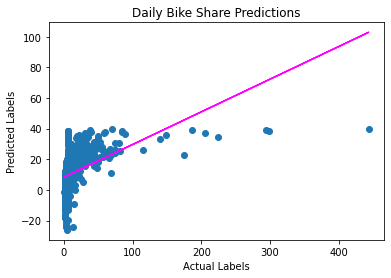

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 326.27604233651704
RMSE: 18.063112753247072
R2: 0.1777004825638504


Lasso() 

MSE: 326.9315298696909
RMSE: 18.081248017481837
R2: 0.17604848544400553


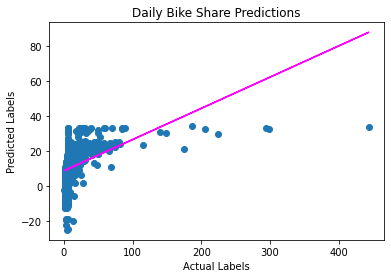

In [ ]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_3 <= 1.90
|   |--- feature_3 <= 0.90
|   |   |--- feature_3 <= 0.10
|   |   |   |--- feature_3 <= -0.30
|   |   |   |   |--- feature_5 <= 0.55
|   |   |   |   |   |--- feature_6 <= -0.50
|   |   |   |   |   |   |--- feature_3 <= -3.80
|   |   |   |   |   |   |   |--- feature_4 <= 0.25
|   |   |   |   |   |   |   |   |--- value: [14.50]
|   |   |   |   |   |   |   |--- feature_4 >  0.25
|   |   |   |   |   |   |   |   |--- value: [13.50]
|   |   |   |   |   |   |--- feature_3 >  -3.80
|   |   |   |   |   |   |   |--- feature_0 <= -0.05
|   |   |   |   |   |   |   |   |--- feature_3 <= -0.90
|   |   |   |   |   |   |   |   |   |--- feature_0 <= -0.07
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= -1.37
|   |   |   |   |   |   |   |   |   |   |   |--- value: [5.65]
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  -1.37
|   |   |   |   |   |   |   |   |   |   |   |--- value: [5.65]
|   |   |   |   |   |   |   |   |   |--- feature_0

MSE: 282.0984428679761
RMSE: 16.795786461728312
R2: 0.2890393919864468


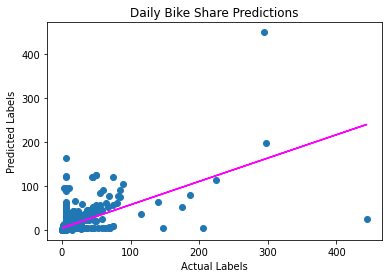

In [ ]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

RandomForestRegressor() 

MSE: 154.0341164155704
RMSE: 12.41104815942515
R2: 0.6117944220170801


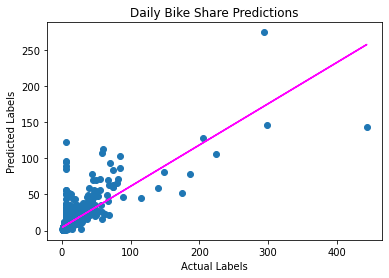

In [ ]:

from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 175.21053913094084
RMSE: 13.236711794510782
R2: 0.5584243919800199


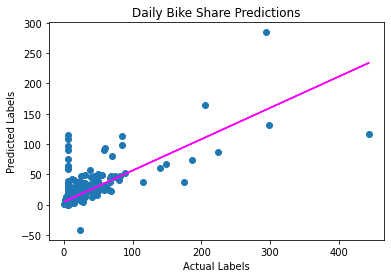

In [ ]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor() 

MSE: 201.39997001755577
RMSE: 14.191545723336686
R2: 0.4924202924274719


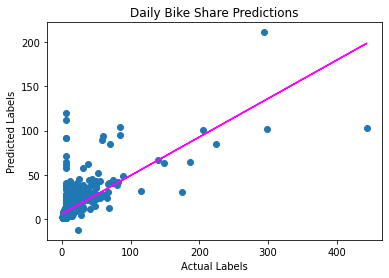

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
Grad_model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = Grad_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

0:	learn: 23.3003445	total: 2ms	remaining: 97.9ms
1:	learn: 22.5367996	total: 4.62ms	remaining: 111ms
2:	learn: 21.7745111	total: 6.5ms	remaining: 102ms
3:	learn: 21.0729650	total: 8.36ms	remaining: 96.2ms
4:	learn: 20.4741136	total: 10.1ms	remaining: 90.5ms
5:	learn: 19.8929136	total: 12ms	remaining: 88.3ms
6:	learn: 19.4046963	total: 14ms	remaining: 86.2ms
7:	learn: 19.0331336	total: 15.9ms	remaining: 83.6ms
8:	learn: 18.6025874	total: 18ms	remaining: 81.9ms
9:	learn: 18.2517134	total: 19.6ms	remaining: 78.5ms
10:	learn: 17.9443137	total: 21.4ms	remaining: 76ms
11:	learn: 17.5957968	total: 23.4ms	remaining: 74.1ms
12:	learn: 17.3027189	total: 25.3ms	remaining: 72ms
13:	learn: 17.0999573	total: 27.2ms	remaining: 69.9ms
14:	learn: 16.8866072	total: 29.1ms	remaining: 67.9ms
15:	learn: 16.6118949	total: 31ms	remaining: 65.9ms
16:	learn: 16.4278555	total: 32.8ms	remaining: 63.7ms
17:	learn: 16.2556116	total: 34.8ms	remaining: 61.9ms
18:	learn: 16.0812456	total: 36.7ms	remaining: 59.8ms
19

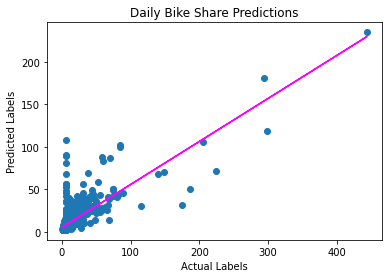

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from catboost import CatBoostRegressor
# Use a Gradient Boosting algorithm
cat = CatBoostRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(cat, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
cat=gridsearch.best_estimator_
print(cat, "\n")

# Evaluate the model using the test data
predictions = cat.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
def snippet_200():
  print()
  print(format("How to find optimal parameters for Catboost using Randomsearchcv for classification", "*^82"))

  import warnings
  warnings.filterwarnings("ignore")

  from sklearn.model_selection import train_test_split
  from sklearn.model_selection import RandomizedSearchCV
  from scipy.stats import uniform as sp_randFloat
  from scipy.stats import randint as sp_randInt
  from catboost import CatBoostRegressor

  X; y
  X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

  model_c = CatBoostRegressor()
  parameters = {"depth": sp_randInt(1,10),
                "learning_rate": sp_randFloat(),
                "iterations": sp_randInt(0.1, 100)}
  

              
  randm = RandomizedSearchCV(estimator=model_c, param_distributions=parameters, cv=2, n_iter=10, n_jobs=-1)
  randm.fit(X_train,y_train)

 #Result 
  print("\n=============================================")
  print(" Results from Random Search ")
  print("\n=============================================")
  print("\n The best estimator across all searched params: \n", randm.best_estimator_)
  print("\n The best score across all searched params: \n", randm.best_score_)
  print("\n The best parameter across all searched params: \n", randm.best_params_)


snippet_200()



How to find optimal parameters for Catboost using Randomsearchcv for classification
0:	learn: 20.7270612	total: 1.25ms	remaining: 101ms
1:	learn: 20.2864244	total: 3.49ms	remaining: 140ms
2:	learn: 19.8509228	total: 4.88ms	remaining: 129ms
3:	learn: 19.4729053	total: 6.37ms	remaining: 124ms
4:	learn: 19.1426415	total: 7.73ms	remaining: 119ms
5:	learn: 18.8741768	total: 9.18ms	remaining: 116ms
6:	learn: 18.6068366	total: 10.6ms	remaining: 114ms
7:	learn: 18.3141859	total: 12ms	remaining: 111ms
8:	learn: 18.0156392	total: 13.4ms	remaining: 109ms
9:	learn: 17.7115034	total: 14.8ms	remaining: 107ms
10:	learn: 17.4992161	total: 16ms	remaining: 103ms
11:	learn: 17.3097569	total: 17.4ms	remaining: 101ms
12:	learn: 17.1203554	total: 18.8ms	remaining: 99.6ms
13:	learn: 16.9513154	total: 20.2ms	remaining: 98.2ms
14:	learn: 16.7306258	total: 21.6ms	remaining: 96.7ms
15:	learn: 16.5857051	total: 23.1ms	remaining: 95.1ms
16:	learn: 16.4656346	total: 24.6ms	remaining: 94.2ms
17:	learn: 16.3673751	t

In [ ]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


LGBMRegressor() 

MSE: 119.44199471498365
RMSE: 10.92895213252321
R2: 0.6989754628859869


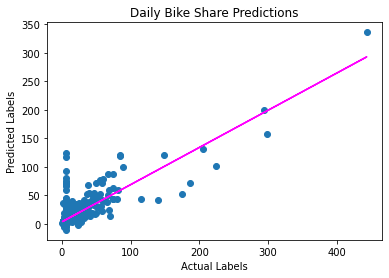

In [ ]:
from lightgbm import LGBMRegressor


# Use a Light Gradient Boosting algorith
model_l = LGBMRegressor().fit(X_train, y_train)

print (model_l, "\n")

# Evaluate the model using the test data
predictions = model_l.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

0:	learn: 19.5552648	total: 2.06ms	remaining: 119ms
1:	learn: 18.2525544	total: 3.11ms	remaining: 88.7ms
2:	learn: 17.3820836	total: 4.09ms	remaining: 76.5ms
3:	learn: 17.0294455	total: 5.18ms	remaining: 71.2ms
4:	learn: 16.9010055	total: 6.17ms	remaining: 66.6ms
5:	learn: 16.7851923	total: 7.16ms	remaining: 63.3ms
6:	learn: 16.6759207	total: 8.08ms	remaining: 60ms
7:	learn: 16.6013918	total: 9.08ms	remaining: 57.9ms
8:	learn: 16.5684595	total: 10.1ms	remaining: 56.3ms
9:	learn: 16.5362647	total: 11.2ms	remaining: 54.8ms
10:	learn: 16.4496026	total: 12.6ms	remaining: 54.9ms
11:	learn: 16.3536497	total: 13.6ms	remaining: 53.2ms
12:	learn: 16.0823242	total: 14.5ms	remaining: 51.4ms
13:	learn: 15.9957835	total: 15.5ms	remaining: 49.9ms
14:	learn: 15.9579506	total: 16.5ms	remaining: 48.3ms
15:	learn: 15.7821041	total: 17.5ms	remaining: 47ms
16:	learn: 15.6060633	total: 18.6ms	remaining: 45.8ms
17:	learn: 15.5393908	total: 19.9ms	remaining: 45.2ms
18:	learn: 15.5094472	total: 20.8ms	remaini

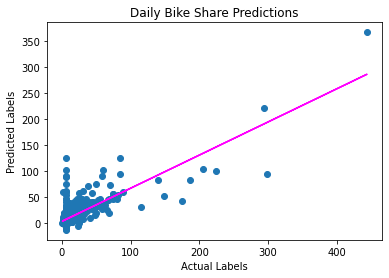

In [ ]:
from catboost import CatBoostRegressor

# Fit a lasso model on the training set
real_cat_model = CatBoostRegressor(depth=2,iterations= 59, learning_rate=0.7917487047720935).fit(X_train, y_train)
print(real_cat_model, "\n")

# Evaluate the model using the test data
predictions = real_cat_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Learning rate set to 0.056186
0:	learn: 22.5189507	total: 8.19ms	remaining: 8.18s
1:	learn: 22.0365762	total: 12.4ms	remaining: 6.18s
2:	learn: 21.5454980	total: 22ms	remaining: 7.31s
3:	learn: 21.1030691	total: 26.8ms	remaining: 6.68s
4:	learn: 20.6816203	total: 33.5ms	remaining: 6.66s
5:	learn: 20.2790462	total: 40.3ms	remaining: 6.67s
6:	learn: 19.9210306	total: 47ms	remaining: 6.67s
7:	learn: 19.5669419	total: 50.6ms	remaining: 6.27s
8:	learn: 19.2093763	total: 56.6ms	remaining: 6.23s
9:	learn: 18.8976968	total: 63.1ms	remaining: 6.25s
10:	learn: 18.6102781	total: 67ms	remaining: 6.03s
11:	learn: 18.3384682	total: 73.3ms	remaining: 6.03s
12:	learn: 18.0844879	total: 79.2ms	remaining: 6.01s
13:	learn: 17.8501466	total: 87.3ms	remaining: 6.15s
14:	learn: 17.6336646	total: 91.8ms	remaining: 6.03s
15:	learn: 17.4304594	total: 98.4ms	remaining: 6.05s
16:	learn: 17.2426752	total: 105ms	remaining: 6.08s
17:	learn: 17.0576022	total: 116ms	remaining: 6.35s
18:	learn: 16.8887967	total: 122ms

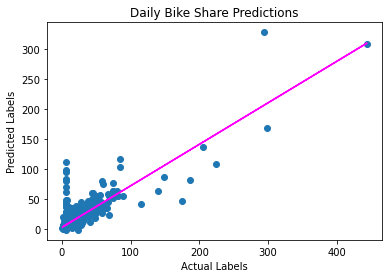

In [ ]:

from catboost import CatBoostRegressor

# Train the model
model_c = CatBoostRegressor().fit(X_train, y_train)
print(model_c, "\n")

# Evaluate the model using the test data
predictions = model_c.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
sub.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,1.0
1,VHL17149,1.0
2,VHL10927,1.0
3,VHL12909,1.0
4,VHL12348,1.0


In [ ]:
submission = sub.copy()

In [ ]:
print(len(train))
print(len(test))

7205
2061


In [ ]:
print(len(submission))

2061


In [ ]:
test.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL18518,Abuja,BMW,323i,"2,008",White,Foreign Used,30524.0
1,VHL17149,Lagos,Toyota,Camry,"2,013",White,Foreign Used,NaN
2,VHL10927,Lagos,Toyota,Highlander Limited V6,"2,005",Gold,Foreign Used,NaN
3,VHL12909,Lagos,Toyota,Camry,"2,011",Gray,Foreign Used,166839.0
4,VHL12348,Lagos,Lexus,ES 350 FWD,"2,013",Red,Foreign Used,88862.0


In [ ]:
# The main of this section is to rename the different 
# class in our categorigal feature that were not properly named.
# or chanage the data type of a column

cat_features = {
    "Location",
    "Model",
    "Maker",
    "Year",
    "Colour",
    "Type"
}

for cat_feature in cat_features:
  print(cat_feature, test[cat_feature].unique(), sep=":")
  print("#"*50)

Maker:['BMW' 'Toyota' 'Lexus' 'Mercedes-Benz' 'Honda' 'Pontiac' 'Hyundai'
 'Land Rover' 'Mitsubishi' 'Volkswagen' 'Acura' 'Mazda' 'Ford' 'Jaguar'
 'Opel' 'Infiniti' 'Kia' 'Peugeot' 'Nissan' 'Chevrolet' 'Cadillac' 'Seat'
 'Audi' 'Porsche' 'Dodge' 'GMC' 'Renault' 'Lincoln' 'Maserati' 'Chrysler'
 'Fiat' 'Subaru' 'Mini' 'Scion' 'Buick' 'Rolls-Royce' 'Volvo' 'Jeep'
 'Lamborghini' 'Brabus']
##################################################
Model:['323i' 'Camry' 'Highlander Limited V6' 'ES 350 FWD' 'GLE-Class'
 'Sienna LE 4dr' 'ES 350' 'CR-V' 'RAV4 XLE FWD' 'RX' 'Sequoia'
 '4-Runner Limited' 'Corolla LE' 'Accord' 'Highlander SE' 'Vibe AWD'
 'RX 350 F Sport FWD' 'Creta' 'Range Rover Vogue' 'E320'
 'Land Cruiser Prado' 'Sonata' 'Sienna' '4-Runner Limited 4WD' 'C300'
 'E350' 'L200 Double Cab 2.5 136hp' 'Avalon XLE Plus (3.5L 6cyl 6A)'
 '4-Runner' 'RX 330' 'Touareg' 'GX 460 Base' 'GL-Class' 'M Class'
 'M Class ML 350 4Matic' 'GLK-Class' 'ES' 'Corolla' 'TLX' 'LX 570 Base'
 'Hilux' 'RX 350' 'IS 35

In [ ]:
# Label Encoding
cat_features = ["Location","Maker","Year","Colour","Type", "Model"]

for cat_feature in cat_features:
  test[f"{cat_feature}_cat"] = test[cat_feature].astype('category')
  test[f"{cat_feature}_cat"] = test[f"{cat_feature}_cat"].cat.codes


# Read more on Pandas get_dummies

test.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance,Location_cat,Maker_cat,Year_cat,Colour_cat,Type_cat,Model_cat
0,VHL18518,Abuja,BMW,323i,"2,008",White,Foreign Used,30524.0,0,2,14,16,1,8
1,VHL17149,Lagos,Toyota,Camry,"2,013",White,Foreign Used,NaN,2,37,19,16,1,123
2,VHL10927,Lagos,Toyota,Highlander Limited V6,"2,005",Gold,Foreign Used,NaN,2,37,11,7,1,272
3,VHL12909,Lagos,Toyota,Camry,"2,011",Gray,Foreign Used,166839.0,2,37,17,8,1,123
4,VHL12348,Lagos,Lexus,ES 350 FWD,"2,013",Red,Foreign Used,88862.0,2,20,19,12,1,192


In [ ]:
# Drop the reductant features since Label encoding have been done
test.drop(["Location", "Model", "Maker","Year","Colour", "Type", "VehicleID"], axis=1, inplace=True)
test.head()

,Distance,Location_cat,Maker_cat,Year_cat,Colour_cat,Type_cat,Model_cat
0,30524.0,0,2,14,16,1,8
1,NaN,2,37,19,16,1,123
2,NaN,2,37,11,7,1,272
3,166839.0,2,37,17,8,1,123
4,88862.0,2,20,19,12,1,192


In [ ]:
test.isnull().sum()

Distance        676
Location_cat      0
Maker_cat         0
Year_cat          0
Colour_cat        0
Type_cat          0
Model_cat         0
dtype: int64

In [ ]:
test["Distance"].fillna(test["Distance"].median(), inplace=True)

In [ ]:
test.isnull().sum()

Distance        0
Location_cat    0
Maker_cat       0
Year_cat        0
Colour_cat      0
Type_cat        0
Model_cat       0
dtype: int64

In [ ]:
#scaler = MinMaxScaler(feature_range=(1,100))

#tes = scaler.fit_transform(test)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

tes = scaler.fit_transform(test)

In [ ]:
# Separate features and labels
#tes = test[['Distance', 'Location_cat','Maker_cat','Year_cat','Colour_cat','Type_cat', 'Model_cat']].values
#print('test_features:',tes[:10])

In [ ]:
#test_predictions = real_cat_model.predict(tes)
#test_predictions

In [ ]:
#test_predictions = model_l.predict(tes)
#test_predictions

In [ ]:
test_predictions = model_c.predict(tes)
test_predictions


array([  8.29408902,   5.014877  ,   4.79277633, ...,   6.58626335,
         5.43479884, 107.97754678])

In [ ]:
test_pred = cat.predict(tes)
test_pred

array([ 6.2779071 ,  5.7294575 ,  4.87115607, ...,  8.21017423,
        6.00607358, 27.98726704])

In [ ]:
submission['Amount (Million Naira)'] = test_pred

In [ ]:
submission.to_csv('sub18.csv', index= False)
submission.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,6.277907
1,VHL17149,5.729458
2,VHL10927,4.871156
3,VHL12909,5.245188
4,VHL12348,7.211207


In [ ]:
predictions = model.predict(X_test)